# Linear Regression


In [1]:
! pip3 install statsmodels

In [2]:
#import important libraries
# import numpy for linear algebra functions
import numpy as np 
# import pandas for data processing 
import pandas as pd #for data processing the CSV

# for ploting graph
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# import drybeans csv file with pandas
df = pd.read_csv("drybeans.csv")

## Build the model

In [4]:
# function for Slope
def slope(a,b):
    n = len(a)
    dot_sum = np.sum(a*b)
    sumX = np.sum(a)
    sumY = np.sum(b)
    sumX2 = np.sum(a**2)
    slope = (n * dot_sum - sumX * sumY)/(n * sumX2 - sumX**2)
    return slope

In [5]:
#function to find the intercept of the linear regression line
def intercept(a,b):
    intercept = np.mean(b) - slope(a,b) * np.mean(a)
    return intercept

In [6]:
# function to make predictions using the linear regression algorithm
def prediction(slope, x_input, intercept):
    predict = slope * x_input + intercept
    return predict

In [7]:
#function to find R-squared, which is the regression metric
def rSquared(predicted_values, test_values):
    f = predicted_values
    y = test_values
    sum_sq = np.sum((y - np.mean(y))**2) 
    sum_reg = np.sum((f - np.mean(y))**2) 
    sum_res = np.sum((y - f)**2) 
    R_2 = 1 - (sum_res/sum_sq)
    return R_2    

In [8]:
#function to find the correlation coefficient for given x and y values
def correlationCoefficient(predicted_values, test_values):
    a = predicted_values
    b = test_values
    n = len(a)
    dot_sum = np.sum(a*b)
    sumX = np.sum(a)
    sumY = np.sum(b)
    sumX2 = np.sum(a**2)
    sumY2 = np.sum(b**2)
    score = (n *dot_sum - sumX * sumY) / np.sqrt((n * sumX2 - (sumX)**2)*(n * sumY2 - (sumY)**2))
    return score

In [9]:
#function to find the covariance for given x and y values
def covariance(X,Y):
    a = X
    b = Y
    n = len(a)
    dot_sum = np.sum(a*b)
    cov = dot_sum / n - np.mean(a) * np.mean(b)
    return cov

## Pre-Processing
Before we can run linear regression, we need to pre-process the data and encode labels. We will do this using sklearn's preprocessing package.

In [10]:
# function to process the dataset
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['Area'] = le.fit_transform(res_df['Area'])
    res_df['Perimeter'] = le.fit_transform(res_df['Perimeter'])
    res_df['MajorAxisLength'] = le.fit_transform(res_df['MajorAxisLength'])
    res_df['MinorAxisLength'] = le.fit_transform(res_df['MinorAxisLength'])
    res_df['AspectRation'] = le.fit_transform(res_df['AspectRation'])
    res_df['Eccentricity'] = le.fit_transform(res_df['Eccentricity'])
    res_df['ConvexArea'] = le.fit_transform(res_df['ConvexArea'])
    res_df['EquivDiameter'] = le.fit_transform(res_df['EquivDiameter'])
    res_df['Extent'] = le.fit_transform(res_df['Extent'])
    return res_df
    
# the function and store it in a variable
encoded_df = preprocessor(df)

In [11]:
#setting for linear regression
X = encoded_df.Area
y = encoded_df.Solidity

# Implementation
We will now utilize the functions created above to evaluate the imported dataset For [IBMEmployeeAttrition](https://github.com/Madison-Bunting/INDE-577/blob/main/IBMEmployeeAttrition.csv) specifically, there are lots of variables on which one could run a regression.

In [12]:
#Divide the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
#Find the intercept of the training regression line using the functions created previously
intercept = intercept(X_train,y_train)
slope = slope(X_train,y_train)

predictions = prediction(slope = slope,x_input = X_test, intercept = intercept)

print("R-squared:", rSquared(predicted_values = predictions, test_values = y_test))
print("Correlation Coefficient:", correlationCoefficient(test_values = y_test, predicted_values = predictions))

R-squared: 0.07691941725917184
Correlation Coefficient: 0.2778537497795751


In [14]:
#Linear Regression Equation
y_est = slope * X + intercept

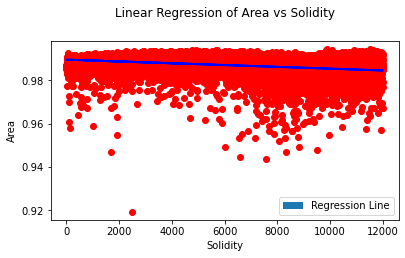

In [15]:

plt.scatter(X,y, c='r')
plt.plot(X,y_est, color = 'b',linewidth=2)
blue_patch = mpatches.Patch(label='Regression Line')
plt.legend(loc=0,handles=[blue_patch])
plt.title('Linear Regression of Area vs Solidity', y=1.1)
plt.ylabel('Area')
plt.xlabel('Solidity')
plt.tight_layout(pad=2)
plt.grid(False)
plt.show()

C:\Users\Rao\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


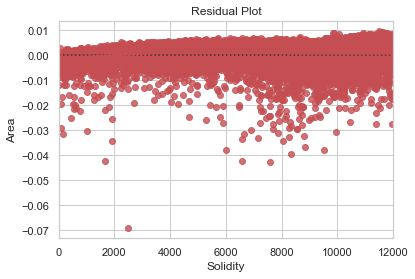

In [16]:
sns.set(style="whitegrid")
sns.residplot(X, y, lowess=True, color="r")
plt.title('Residual Plot')
plt.ylabel('Area')
plt.xlabel('Solidity')
plt.show()

The R^2 value for this plot (0.07) is closer to 0 than 1, indicating a linear regression may not be a good model for estimating monthly income given age. This makes sense because the residuals plot appears to show an increasing trend, meaning the data violates the model's assumption of homoscedasticity.